<a href="https://colab.research.google.com/github/Krishnnavoid/Pulsesort/blob/main/Task_3_240566.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving clenched_data - Copy.csv to clenched_data - Copy.csv
Saving clenched_data.csv to clenched_data.csv
Saving fist_data.csv to fist_data.csv
Saving four_data.csv to four_data.csv
Saving index_finger_data.csv to index_finger_data.csv
Saving okay_data.csv to okay_data.csv
Saving peace_data.csv to peace_data.csv
Saving rest_data.csv to rest_data.csv
Saving rock_data.csv to rock_data.csv
Saving spread_data.csv to spread_data.csv
Saving three_data.csv to three_data.csv
Saving thumb_data.csv to thumb_data.csv
Saving up_data.csv to up_data.csv


Combined dataset shape: (72000, 4)
Label mapping:
{np.int64(0): 'clenched', np.int64(1): 'fist', np.int64(2): 'four', np.int64(3): 'index_finger', np.int64(4): 'okay', np.int64(5): 'peace', np.int64(6): 'rest', np.int64(7): 'rock', np.int64(8): 'spread', np.int64(9): 'three', np.int64(10): 'thumb', np.int64(11): 'up'}
Training set: (57600, 3), Testing set: (14400, 3)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:

              precision    recall  f1-score   support

    clenched       0.00      0.00      0.00      1200
        fist       0.00      0.00      0.00      1200
        four       0.08      0.25      0.13      1200
index_finger       0.00      0.00      0.00      1200
        okay       0.08      0.07      0.08      1200
       peace       0.00      0.00      0.00      1200
        rest       0.00      0.00      0.00      1200
        rock       0.00      0.00      0.00      1200
      spread       0.08      0.37      0.14      1200
       three       0.00      0.00      0.00      1200
       thumb       0.00      0.00      0.00      1200
          up       0.08      0.29      0.12      1200

    accuracy                           0.08     14400
   macro avg       0.03      0.08      0.04     14400
weighted avg       0.03      0.08      0.04     14400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


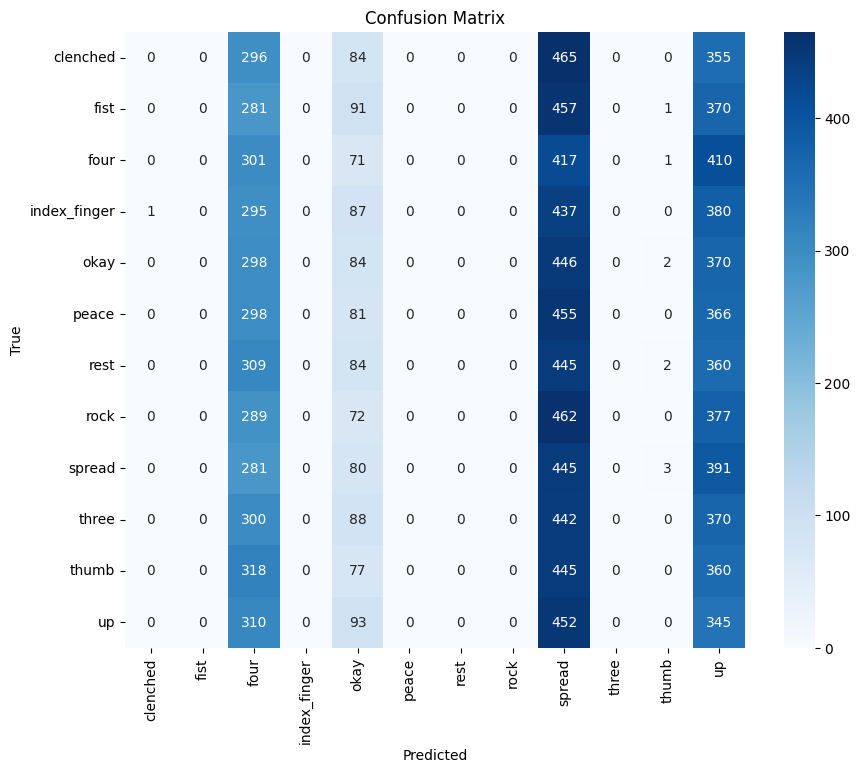

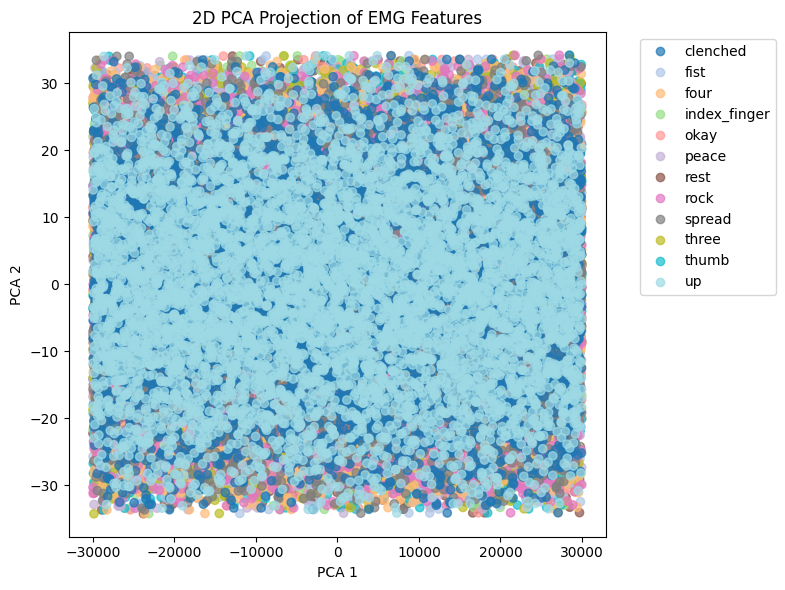

In [ ]:
# Step 0: Import Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA


file_names = [
   'rest_data.csv',
    'index_finger_data.csv',
    'okay_data.csv',
    'thumb_data.csv',
    'fist_data.csv',
    'peace_data.csv',
    'three_data.csv',
    'four_data.csv',
    'rock_data.csv',
    'spread_data.csv',
    'clenched_data.csv',
    'up_data.csv'
]

df = [pd.read_csv(fname) for fname in file_names]
data = pd.concat(df, ignore_index=True)
print(f"Combined dataset shape: {data.shape}")
data.head()


le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['label'])
label_map = dict(zip(le.transform(le.classes_), le.classes_))
print("Label mapping:")
print(label_map)

X = data.drop(columns=['label', 'label_encoded'])
y = data['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label_encoded'], cmap='tab20', alpha=0.7)
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=list(le.classes_),
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.title('2D PCA Projection of EMG Features')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()
